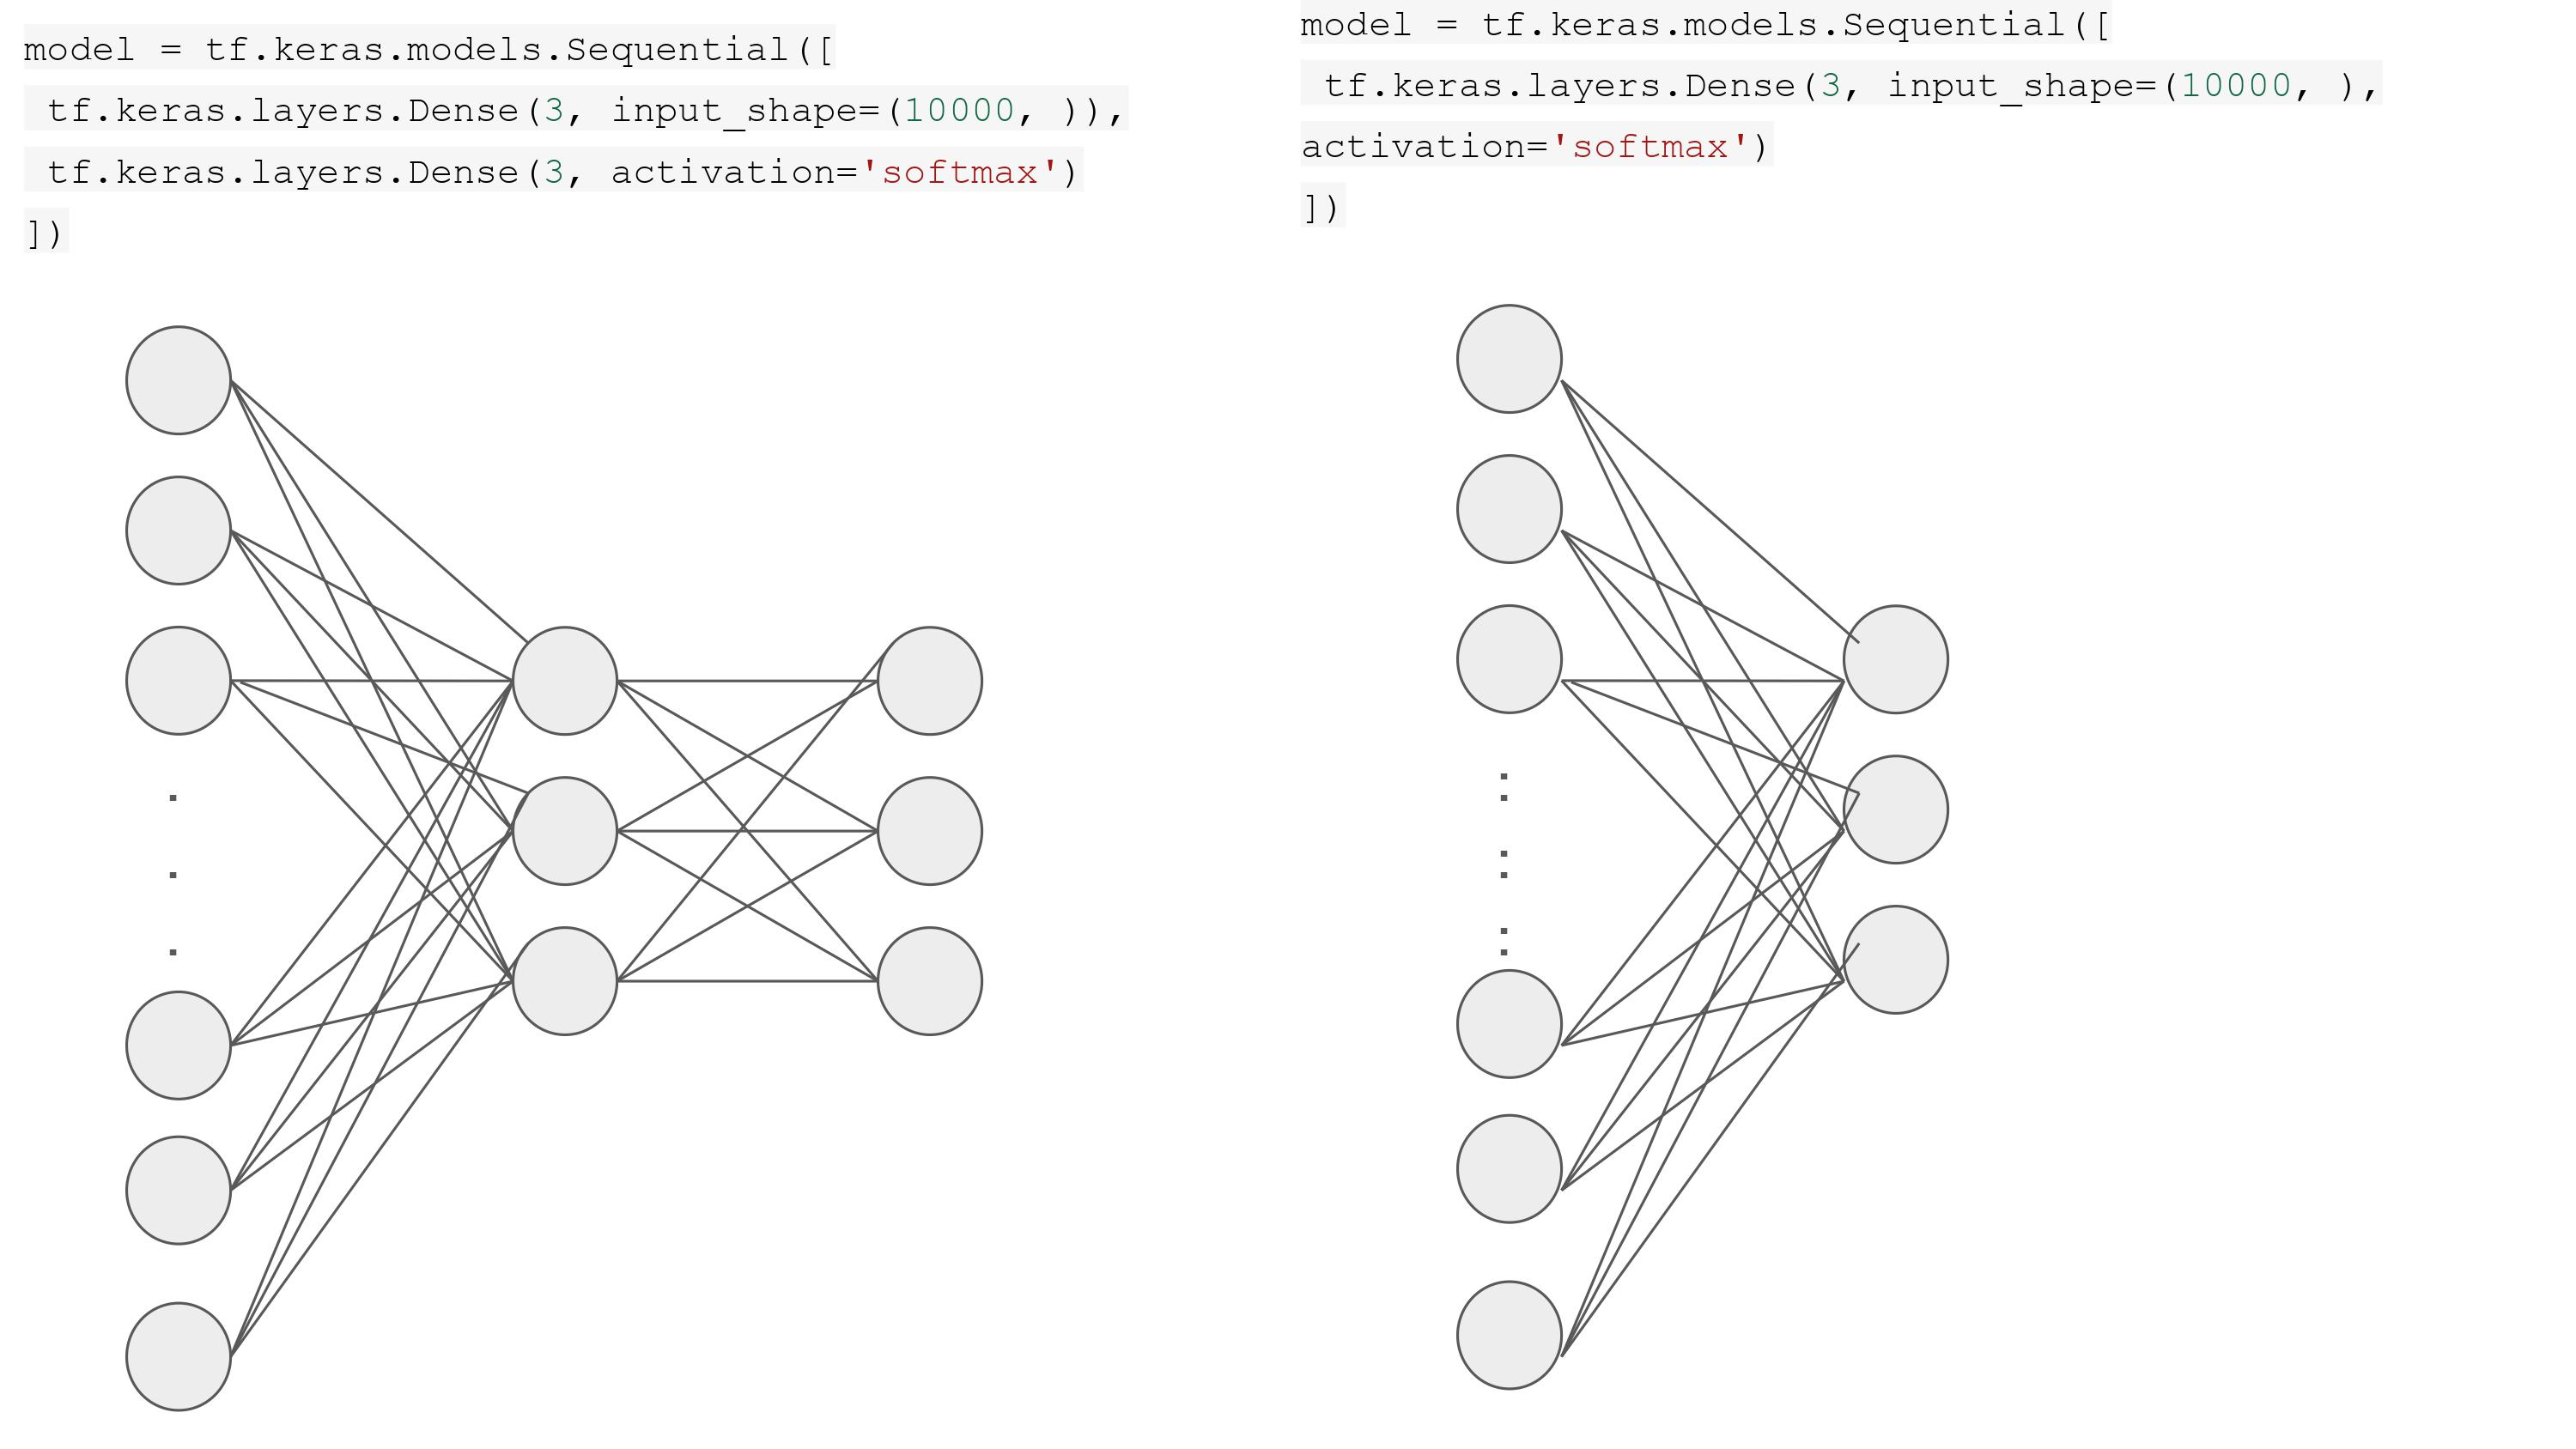

## Preprocessing the dataset for regression
1. Standardization : Change data into the distribution with mean 0 and std1

$$x_{new} = \frac{x-mean(X)}{SD(x)}$$

2. Min-Max normalization : change date with max 1 and min 0

$$x_{new} = \frac{x-min(X)}{max(X)-min(X)}$$


2025.1.15
1. Try with three node

2. Try Eq.(11)

In [1]:
import zipfile
import tensorflow as tf
import os
# import  imageio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from keras.utils import to_categorical #For keras > 2.0
# import cv2
import scipy.io
from sklearn.model_selection import train_test_split
from keras import initializers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from pyESN.pyESN import ESN

In [26]:
# mat = scipy.io.loadmat('case3_quantum.mat')
mat = scipy.io.loadmat('case3_5000.mat')
mat2 = scipy.io.loadmat('g2_a.mat')
mat3 = scipy.io.loadmat('case3_extended_8000.mat')



ns = mat['ns']
n_classic = mat2['n_a']
g2 = mat['g2_a']
g2_classic = mat['g2_a']
Delta = mat['Delta1_vector']


ns3_extended = mat3['ns']
nn_classic = mat3['n_a']
# ns3_extended = ns3_extended[1000:3000]
g2_case3_extended = abs(mat3['g2_a'])
# g2_case3_extended = g2_case3_extended[1000:3000]
Delta_extended = mat3['Delta1_vector'][0]
# Delta_extended = Delta_extended[1000:3000]

In [107]:
n_classic

[0.0028838845725042794,
 0.0028850327286776673,
 0.002886181571082365,
 0.0028873311002661304,
 0.0028884813167771597,
 0.0028896322211642207,
 0.002890783813976628,
 0.002891936095764289,
 0.002893089067077591,
 0.0028942427284675363,
 0.002895397080485588,
 0.002896552123683889,
 0.0028977078586150556,
 0.002898864285832229,
 0.0029000214058891955,
 0.0029011792193402272,
 0.002902337726740182,
 0.002903496928644444,
 0.0029046568256089807,
 0.0029058174181903484,
 0.0029069787069455778,
 0.0029081406924323194,
 0.0029093033752087875,
 0.0029104667558337094,
 0.002911630834866429,
 0.0029127956128668173,
 0.0029139610903953024,
 0.002915127268012899,
 0.0029162941462811827,
 0.002917461725762316,
 0.0029186300070189212,
 0.0029197989906143175,
 0.0029209686771123297,
 0.0029221390670773535,
 0.0029233101610743333,
 0.0029244819596688345,
 0.002925654463426969,
 0.002926827672915339,
 0.0029280015887012747,
 0.0029291762113525426,
 0.002930351541437566,
 0.0029315275795252535,
 0.0029

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kodo0\AppData\Local\Temp\ipykernel_28232\566934785.py:2: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta_{\sigma}$",fontsize=20)
C:\Users\kodo0\AppData\Local\Temp\ipykernel_28232\566934785.py:3: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$<a^{\dagger}a>$',fontsize=20, color='tomato')


([<matplotlib.axis.YTick at 0x1e72ad3ca40>,
 [Text(0, 0.1, '0.1'),
  Text(0, 0.3, '0.3'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.7, '0.7')])

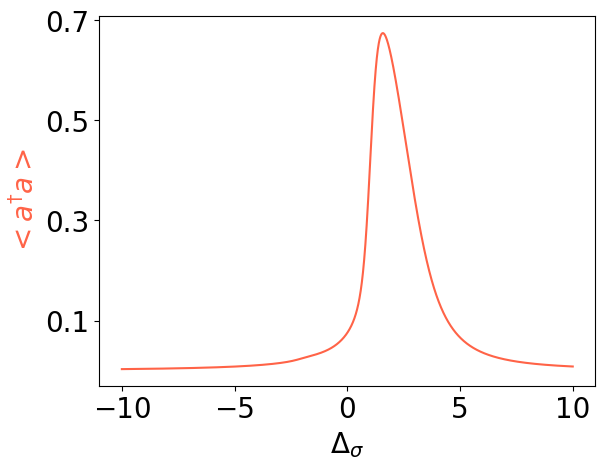

In [121]:
plt.plot(Delta_extended, nn_classic, color='tomato')
plt.xlabel("$\Delta_{\sigma}$",fontsize=20)
plt.ylabel('$<a^{\dagger}a>$',fontsize=20, color='tomato')
plt.xticks([-10,-5,0,5,10],fontsize=20)
plt.yticks([0.1,0.3,0.5,0.7],fontsize=20)
# plt.yticks([1.0,2,3,4,5],fontsize=20)

In [64]:
# np.shape(n_squ)
n_case3_extended_Delta = []
g2_re_extended = []
n_classic = []
# g2_squ_1000 = []
# for i in range(1000,3000,1):
for i in range(8000):
    n_case3_extended_Delta.append(ns3_extended[0][i][0])
    g2_re_extended.append({g2_case3_extended[i][0]:Delta_extended[i]})
    n_classic.append(nn_classic[i][0])

X_train_c3_ex, X_test_c3_ex, Y_train_c3_ex, Y_test_c3_ex = train_test_split(n_case3_extended_Delta,g2_re_extended, test_size=0.05)
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(n_classic, g2_re_extended, test_size=0.05)
X_train_c = np.reshape(X_train_c,[len(X_train_c),1])
X_test_c = np.reshape(X_test_c,[len(X_test_c),1])

In [66]:
len(Y_test_c3_ex)

400

In [68]:
Y_train_g2 = []
Y_train_r = []

Y_test_g2 = []
Y_test_r = []


for ele in Y_train_c3_ex:
  key = list(ele.keys())
  value = list(ele.values())
  Y_train_g2.append(key)
  Y_train_r.append(value[0])
Y_train_g2 = np.reshape(Y_train_g2,(len(Y_train_g2),1))

for ele in Y_test_c3_ex:
  key = list(ele.keys())
  value = list(ele.values())
  Y_test_g2.append(key[0])
  Y_test_r.append(value[0])
Y_test_g2 = np.reshape(Y_test_g2,(len(Y_test_g2),1))


Y_train_g2_c = []
Y_train_r_c = []

Y_test_g2_c = []
Y_test_r_c = []

for ele in Y_train_c:
  key = list(ele.keys())
  value = list(ele.values())
  Y_train_g2_c.append(key)
  Y_train_r_c.append(value[0])
Y_train_g2_c = np.reshape(Y_train_g2_c,(len(Y_train_g2_c),1))

for ele in Y_test_c:
  key = list(ele.keys())
  value = list(ele.values())
  Y_test_g2_c.append(key[0])
  Y_test_r_c.append(value[0])
Y_test_g2_c = np.reshape(Y_test_g2_c,(len(Y_test_g2_c),1))

In [70]:
np.shape(X_train_c)

(7600, 1)

In [72]:
np.shape(Y_train_g2_c)

(7600, 1)

In [125]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train_c3_ex, Y_train_g2)
Y_predict_RFR = regressor.predict(X_test_c3_ex)
s1=regressor.score(X_train_c3_ex, Y_train_g2)
s2=regressor.score(X_test_c3_ex, Y_test_g2)
print([s1,s2])

# X_train_c, X_test_c, Y_train_c, Y_test_c 
regressor_classic = RandomForestRegressor(n_estimators=100)
regressor_classic.fit(X_train_c, Y_train_g2_c)
Y_predict_RFR_classic = regressor_classic.predict(X_test_c)
s1_c=regressor_classic.score(X_train_c, Y_train_g2_c)
s2_c=regressor_classic.score(X_test_c, Y_test_g2_c)
print([s1_c,s2_c])

C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.9912896234895373, 0.9397182954537495]


C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.7231113327953043, -1.0311186769054737]


In [75]:
print([mean_squared_error(Y_test_g2, Y_predict_RFR),mean_squared_error(Y_test_g2_c, Y_predict_RFR_classic)])

[0.03542706453613353, 1.2144756566713528]


<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kodo0\AppData\Local\Temp\ipykernel_28232\557481473.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta_{2}$',fontsize=20)


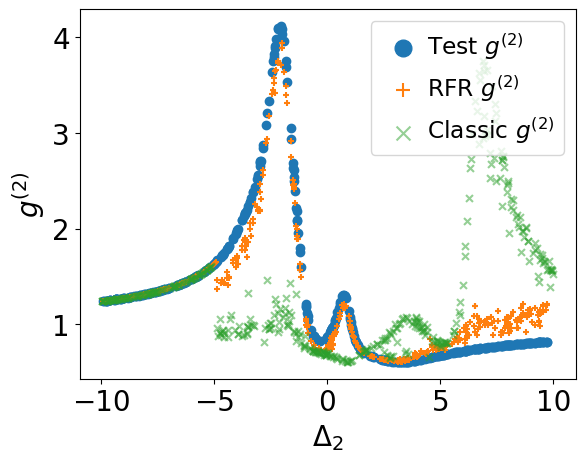

In [103]:
plt.scatter(Y_test_r, Y_test_g2,label = 'Test $g^{(2)}$')
plt.scatter(Y_test_r, Y_predict_RFR,marker="+",s=25,label = 'RFR $g^{(2)}$')
plt.scatter(Y_test_r_c, Y_predict_RFR_classic,marker="x",s=25,label = 'Classic $g^{(2)}$', alpha=0.5)
plt.xlabel('$\Delta_{2}$',fontsize=20)
plt.ylabel('$g^{(2)}$',fontsize=20)
plt.xticks([-10,-5,0,5,10],fontsize=20)
plt.yticks([1,2,3,4],fontsize=20)
plt.legend(fontsize=16.8,markerscale=2,handletextpad=0.001, loc=1)